<a href="https://colab.research.google.com/github/TeamHub2/Machine-Learning/blob/main/Fatel_health_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support,roc_auc_score,classification_report
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Fetal Health/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


([<matplotlib.patches.Wedge at 0x7f57a2f23490>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.3460397647298661, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

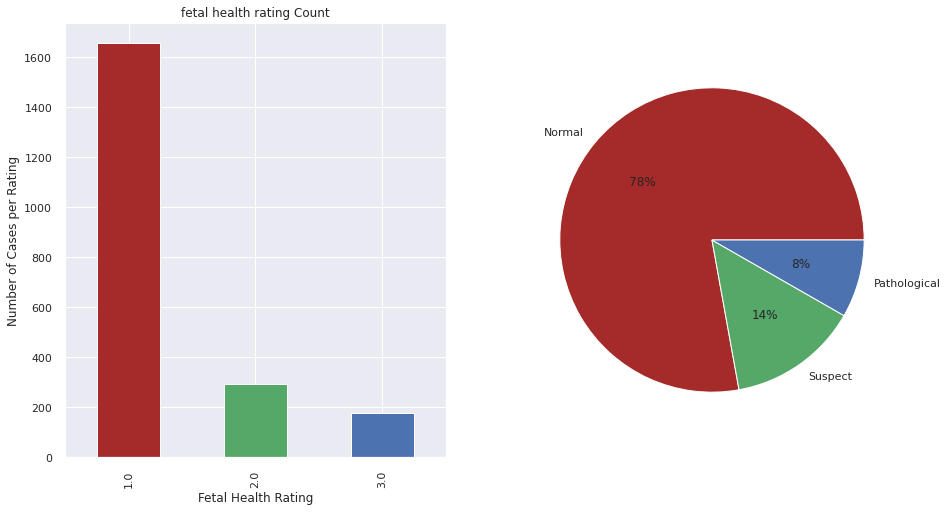

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
data.fetal_health.value_counts().plot(kind='bar',figsize=(15,8),color = ['brown','g','b'])
plt.title('fetal health rating Count')
plt.xlabel('Fetal Health Rating')
plt.ylabel('Number of Cases per Rating')

plt.subplot(122)
plt.pie(data.fetal_health.value_counts(),labels=[
    'Normal', 'Suspect', 'Pathological'], colors = ['brown', 'g', 'b'], autopct='%1.0f%%')

In [ ]:
X=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']

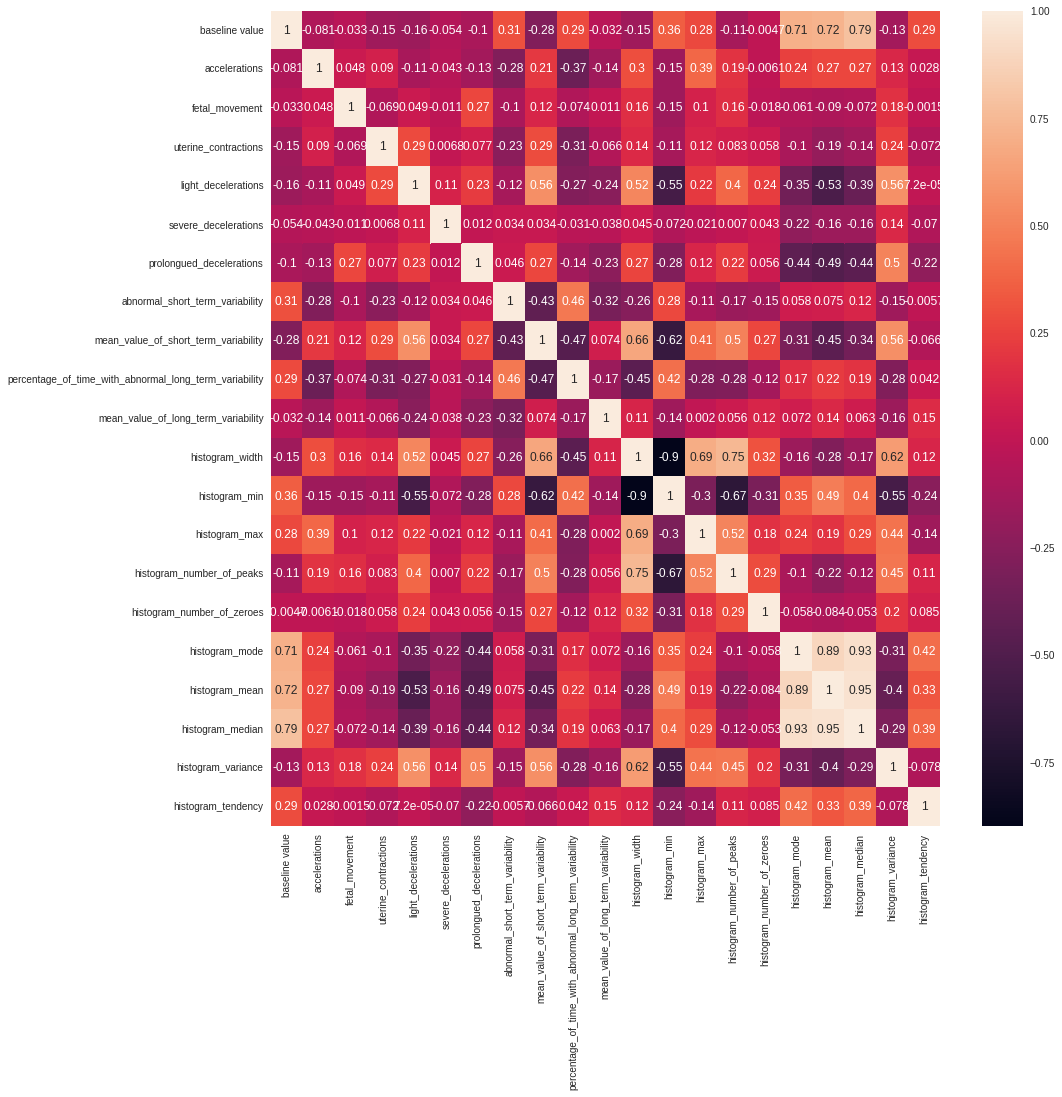

In [ ]:
corr=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health.

Accelerations Vs Fetal Movement by Fetal Health

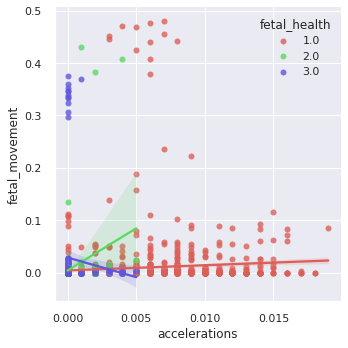

In [ ]:
sns.lmplot(data = data, x = "accelerations", y = "fetal_movement", palette = 'hls', hue = "fetal_health", legend_out = False)
plt.show()

Prolongued Decelerations Vs Fetal Movement by Fetal Health

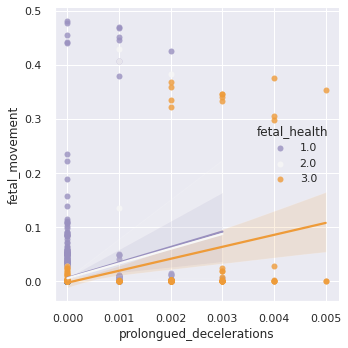

In [ ]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette='PuOr_r', hue="fetal_health",legend_out=False)
plt.show()

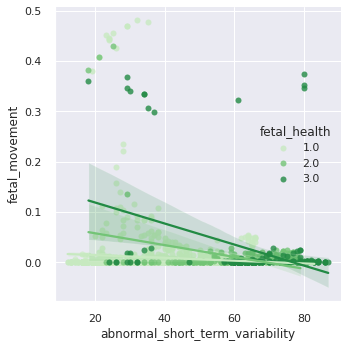

In [ ]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette='Greens', hue="fetal_health",legend_out=False)
plt.show()

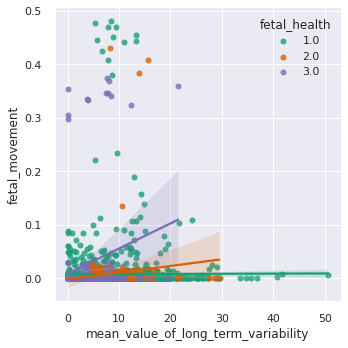

In [ ]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette='Dark2', hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
grouped=data.groupby(by='fetal_health').mean()
grouped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


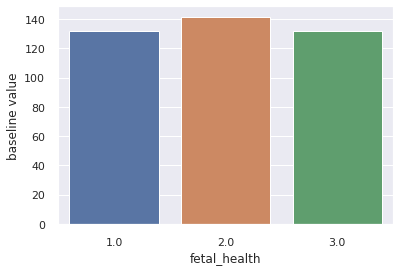

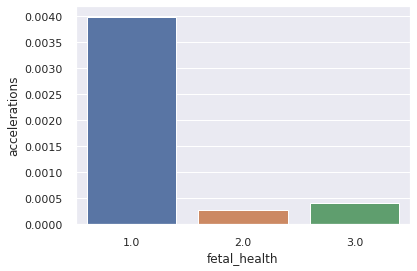

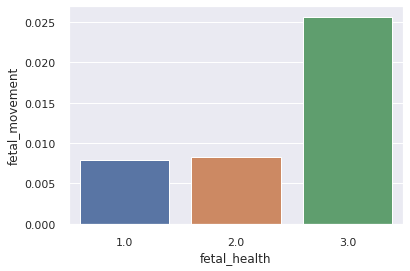

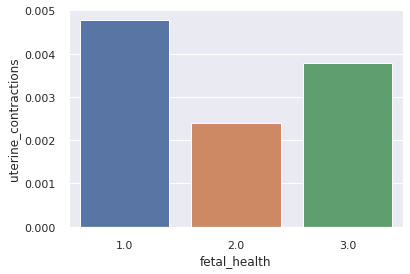

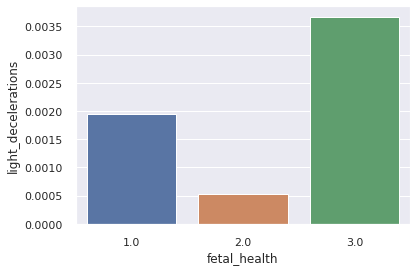

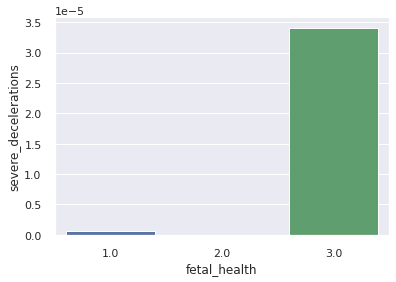

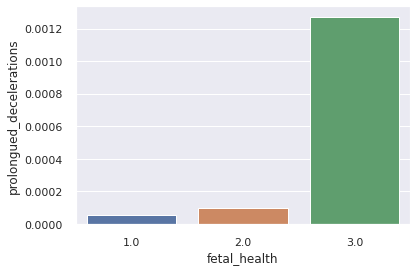

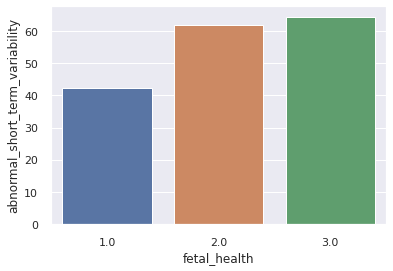

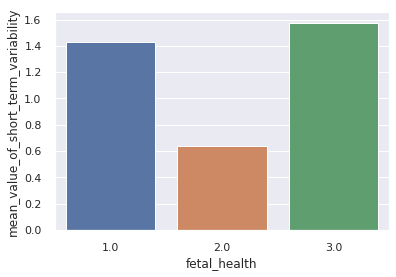

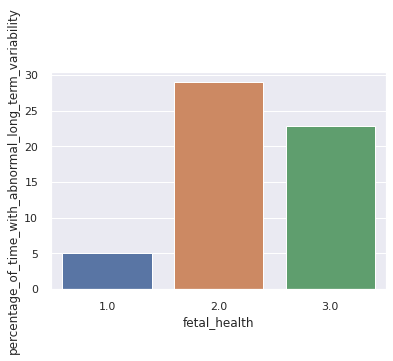

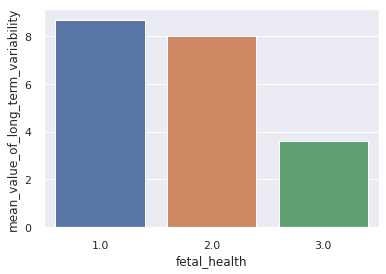

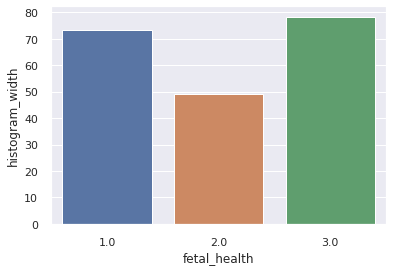

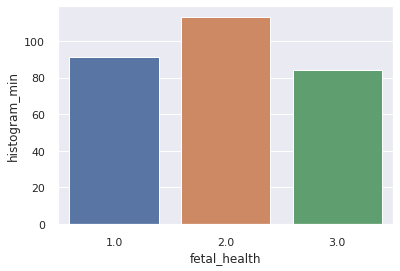

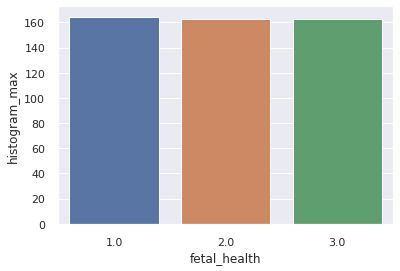

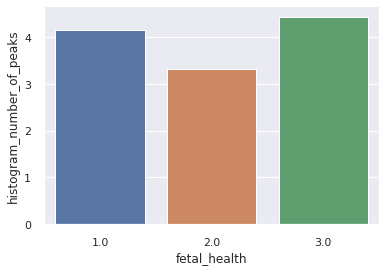

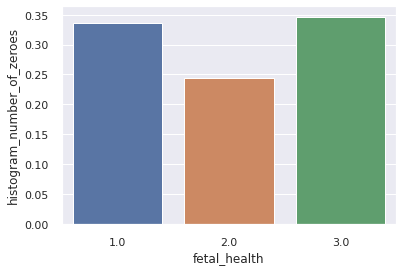

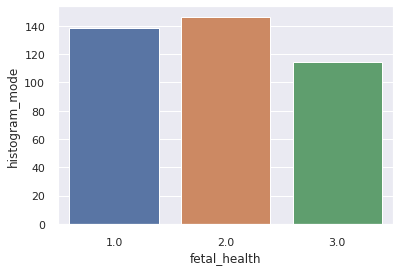

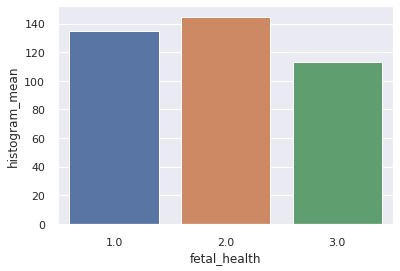

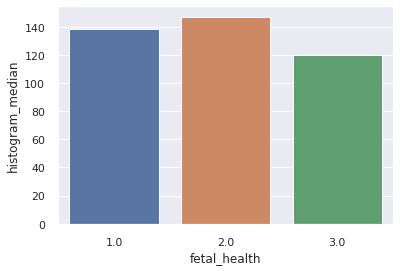

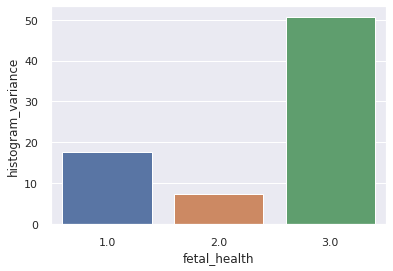

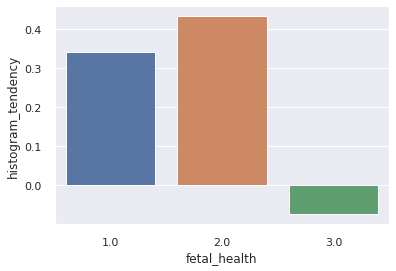

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index,i in enumerate(grouped.columns,start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

Oversampling of Minority Class

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
y_over

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4960    3.0
4961    3.0
4962    3.0
4963    3.0
4964    3.0
Name: fetal_health, Length: 4965, dtype: float64

In [ ]:
X_over

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,130.0,0.002,0.000,0.012,0.013,0.0,0.000,61.0,2.0,0.0,...,127.0,50.0,177.0,5.0,0.0,121.0,98.0,115.0,94.0,0.0
4961,146.0,0.000,0.003,0.000,0.000,0.0,0.000,81.0,0.2,67.0,...,13.0,137.0,150.0,1.0,0.0,146.0,144.0,146.0,1.0,0.0
4962,123.0,0.000,0.000,0.000,0.000,0.0,0.000,71.0,0.3,77.0,...,19.0,110.0,129.0,1.0,0.0,123.0,123.0,124.0,0.0,1.0
4963,128.0,0.000,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,129.0,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0


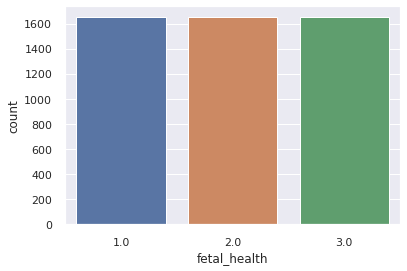

In [ ]:
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')

Dimensionality Reduction and visualization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)

In [ ]:
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.499725,-0.517109,-0.236644,-1.151978,-0.632580,-0.111529,-0.473495,0.978251,-0.723681,0.938391,...,-0.091113,-0.999202,-1.984800,-0.645009,-0.431871,-0.564939,0.293798,-0.744124,1.080921,1.164690
1,-0.314915,1.502381,-0.236644,0.730492,0.261205,-0.111529,-0.473495,-2.290620,0.870011,-0.732001,...,1.409600,-0.819553,1.838367,0.627327,0.919256,0.351274,0.246764,0.269024,-0.309346,-0.354271
2,-0.216181,0.492636,-0.236644,1.357982,0.261205,-0.111529,-0.473495,-2.348992,0.870011,-0.732001,...,1.409600,-0.819553,1.838367,0.309243,0.919256,0.351274,0.199730,0.162376,-0.286555,-0.354271
3,-0.117447,0.492636,-0.236644,1.357982,0.261205,-0.111529,-0.473495,-2.348992,1.168828,-0.732001,...,1.114005,-1.268675,0.351580,2.217748,-0.431871,0.176758,0.152697,0.109053,-0.286555,1.164690
4,-0.314915,1.838962,-0.236644,1.357982,-0.632580,-0.111529,-0.473495,-2.348992,1.168828,-0.732001,...,1.114005,-1.268675,0.351580,1.581580,-0.431871,0.176758,0.246764,0.162376,-0.332137,1.164690


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) #getting 3 components with highest variance
X_pca=pca.fit_transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,-0.528750,-2.202931,0.625052
1,1.729394,3.305483,0.961529
2,1.717978,3.189427,0.988614
3,1.577998,3.755523,1.760523
4,1.273039,3.879783,2.222476


In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_pca, x=0, y=1, z=2,
              color=y_over, size_max=10)
fig.show()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.528749,-2.202929,0.626098,0.261478,1.304150,-1.045391,1.720002,0.485495,0.118107,-0.337159,1.105582,0.798099,-0.723911
1,1.729393,3.305472,0.961196,-0.074946,-0.588944,0.611591,0.034774,-0.831086,0.362745,0.478995,0.282524,-0.358663,0.459069
2,1.717977,3.189413,0.988226,0.184029,-0.241340,0.423209,-0.982566,-0.696902,-0.277369,0.678079,0.328603,-0.467456,0.259132
3,1.577999,3.755527,1.759383,0.068938,1.556814,-0.511604,-0.170756,0.213722,-1.644732,0.919781,0.447728,-1.018629,0.097083
4,1.273039,3.879785,2.221606,-0.544203,0.737959,-0.372915,0.512290,0.220954,-0.985698,0.179231,0.742976,-1.062863,-0.293874


Model Building

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_over,random_state=42,stratify=y_over)

K-Nearest Neighbor

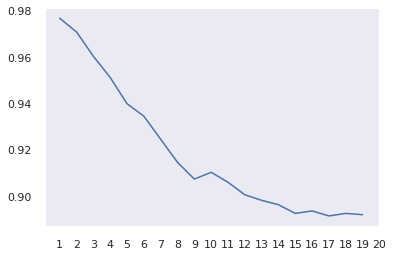

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

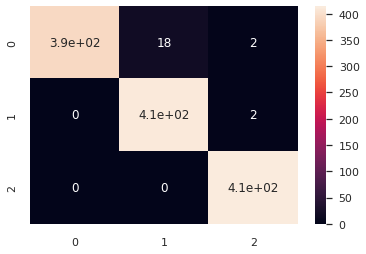

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(confusion_knn,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       414
         2.0       0.96      1.00      0.98       414
         3.0       0.99      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



Although got 98% still not satisfied because neighbor=1 usually mean my model is very much dependent on just its neighbor may not work on new data. Lets try new models

Support Vector Machine


              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       414
         2.0       1.00      0.99      0.99       414
         3.0       1.00      1.00      1.00       414

    accuracy                           0.99      1242
   macro avg       0.99      0.99      0.99      1242
weighted avg       0.99      0.99      0.99      1242



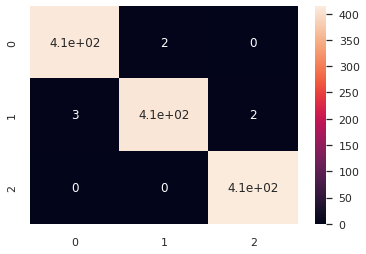

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_svc,annot=True)
print(classification_report(y_test,y_pred_svc))

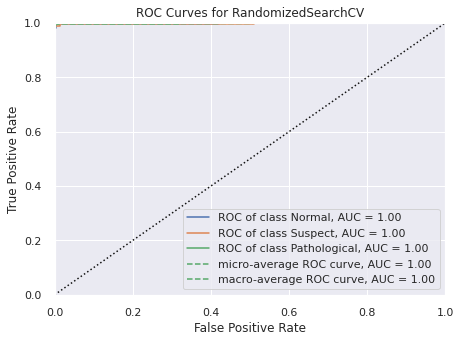

In [ ]:
classes = ['Normal', 'Suspect', 'Pathological']
fig, ax = plt.subplots(figsize=(7, 5))
roc = ROCAUC(rcv, classes=classes, ax=ax)
roc.fit(X_train, y_train)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

Support Vector Classifier has done a tremendous job!! I dont think we require to move for new models but just for learning lets explore!!

Logistic Regression

              precision    recall  f1-score   support

         1.0       0.93      0.85      0.89       414
         2.0       0.79      0.88      0.83       414
         3.0       0.91      0.90      0.90       414

    accuracy                           0.87      1242
   macro avg       0.88      0.87      0.87      1242
weighted avg       0.88      0.87      0.87      1242



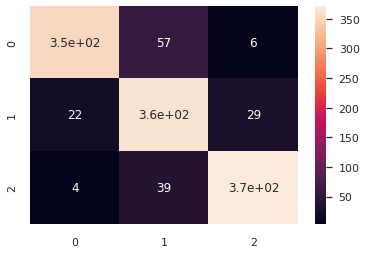

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[30,50,70,150,200,300,400,500,700,1200,1500]}
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
sns.heatmap(confusion_log,annot=True)
print(classification_report(y_test,y_pred_log))

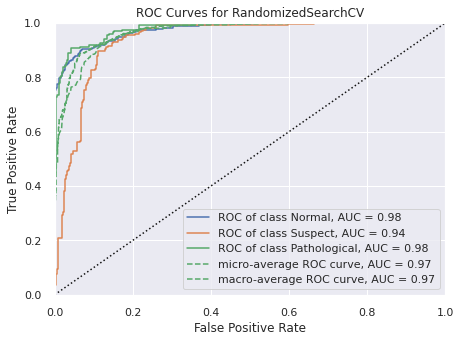

In [ ]:
classes = ['Normal', 'Suspect', 'Pathological']
fig, ax = plt.subplots(figsize=(7, 5))
roc = ROCAUC(log, classes=classes, ax=ax)
roc.fit(X_train, y_train)        # Fit the training data to the visualizer
roc.score(X_test, y_test)        # Evaluate the model on the test data
roc.show()

Random Forest Classifier

              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       414
         2.0       0.94      1.00      0.97       414
         3.0       0.99      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



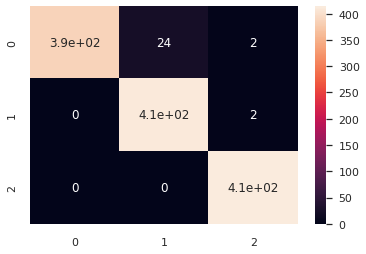

In [ ]:
param_grid = {
'n_estimators': [50, 100, 150, 200],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_rcv,annot=True)
print(classification_report(y_test,y_pred_rcv))

This project had few main steps

Oversampling of minority class and
Dimensionality Reduction